In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
y_0900_0910 = pd.read_csv('../data/y_rate/y_0900_0910.csv',index_col=0)
y_0900_0915 = pd.read_csv('../data/y_rate/y_0900_0915.csv',index_col=0)
y_0900_0920 = pd.read_csv('../data/y_rate/y_0900_0920.csv',index_col=0)
y_0900_0925 = pd.read_csv('../data/y_rate/y_0900_0925.csv',index_col=0)
y_0900_0930 = pd.read_csv('../data/y_rate/y_0900_0930.csv',index_col=0)
y_0900_0935 = pd.read_csv('../data/y_rate/y_0900_0935.csv',index_col=0)
y_0900_0940 = pd.read_csv('../data/y_rate/y_0900_0940.csv',index_col=0)
y_0900_0945 = pd.read_csv('../data/y_rate/y_0900_0945.csv',index_col=0)
y_0900_0950 = pd.read_csv('../data/y_rate/y_0900_0950.csv',index_col=0)
y_0900_0955 = pd.read_csv('../data/y_rate/y_0900_0955.csv',index_col=0)
y_0900_1000 = pd.read_csv('../data/y_rate/y_0900_1000.csv',index_col=0)

In [11]:
df_list = [y_0900_0910, y_0900_0915, y_0900_0920, y_0900_0925, y_0900_0930, y_0900_0935, y_0900_0940, y_0900_0945,
        y_0900_0950, y_0900_0955, y_0900_1000]
df_list_1 = ["y_0900_0910", 'y_0900_0915', 'y_0900_0920', 'y_0900_0925', 'y_0900_0930', 'y_0900_0935', 'y_0900_0940', 'y_0900_0945',
            'y_0900_0950', 'y_0900_0955', 'y_0900_1000']

In [12]:
for i, j in enumerate(df_list):
    j[f'{i}_rate'] = j['y_rate']
    j.drop(columns=['y_rate'],inplace=True)

In [14]:
y_0900_0910

,date,0_rate
0,20181001,0.001989
1,20181002,0.000849
2,20181004,-0.004029
3,20181005,-0.001026
4,20181008,0.000687
...,...,...
1236,20231020,-0.001088
1237,20231023,-0.000784
1238,20231024,-0.001566
1239,20231025,-0.000779


In [16]:
for i in df_list :
    y_0900_0910 = pd.merge(y_0900_0910, i, on='date', how='inner')

In [18]:
y = y_0900_0910

In [19]:
y['date'] = pd.to_datetime(y['date'], format='%Y%m%d')
y.set_index('date', inplace=True)

In [21]:
y.drop(columns='0_rate_y',inplace=True)

In [23]:
y.set_index('date', inplace=True)

In [29]:
y.columns = df_list_1

NameError: name 'df_list_1' is not defined

In [30]:
print(y.corr(method='pearson'))

          0_rate_x    1_rate    2_rate    3_rate    4_rate    5_rate  \
0_rate_x  1.000000  0.792958  0.735385  0.650741  0.624235  0.589584   
1_rate    0.792958  1.000000  0.904846  0.813986  0.773812  0.738307   
2_rate    0.735385  0.904846  1.000000  0.916620  0.863248  0.821022   
3_rate    0.650741  0.813986  0.916620  1.000000  0.935025  0.897075   
4_rate    0.624235  0.773812  0.863248  0.935025  1.000000  0.952554   
5_rate    0.589584  0.738307  0.821022  0.897075  0.952554  1.000000   
6_rate    0.552744  0.694403  0.776894  0.843551  0.901745  0.948910   
7_rate    0.538234  0.677742  0.758588  0.817190  0.869222  0.919655   
8_rate    0.521052  0.678124  0.745558  0.795379  0.843824  0.886071   
9_rate    0.522327  0.659483  0.724416  0.770720  0.818721  0.862218   
10_rate   0.508398  0.642520  0.708123  0.757292  0.803067  0.840521   

            6_rate    7_rate    8_rate    9_rate   10_rate  
0_rate_x  0.552744  0.538234  0.521052  0.522327  0.508398  
1_rate    0.6

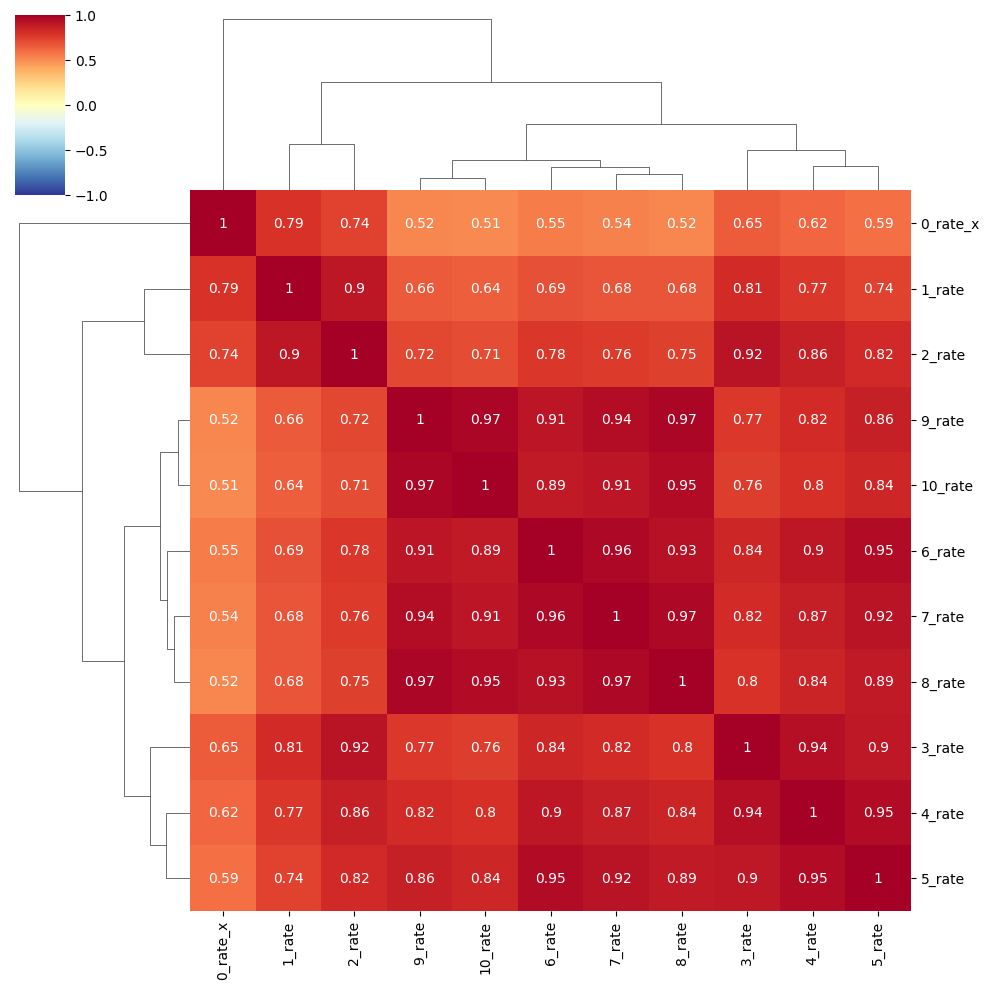

In [28]:
df = y.corr()

sns.clustermap(df, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )